In [1]:
import argparse
import json
import os
from Experiments import singleshot
from Experiments import multishot
from Experiments.theory import unit_conservation
from Experiments.theory import layer_conservation
from Experiments.theory import imp_conservation
from Experiments.theory import schedule_conservation
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from Utils import load
from Utils import generator
from Utils import metrics
from train import *
from prune import *
import matplotlib.pyplot as plt


def plot_weight_histograms(model, result_dir, pruner):
    layer_names = [name for name, _ in model.named_parameters() if 'weight' in name or 'bias' in name]
    num_layers = len(layer_names)
    
    # Specify the number of columns for your subplot grid
    num_columns = 4
    num_rows = (num_layers + num_columns - 1) // num_columns  # Calculate rows needed

    plt.figure(figsize=(15, num_rows * 2.5))  # Adjust figure size based on grid size
    
    plt.style.use('seaborn-v0_8-white')

    
    for i, (name, param) in enumerate(model.named_parameters()):
        if 'weight' in name or 'bias' in name:  # Focus on weight parameters
            weights = param.data.cpu().numpy().flatten()  # Flatten the weights
            print("number:", i)

            ax = plt.subplot(num_rows, num_columns, i + 1)  # Plot each layer in its subplot
            ax.hist(weights, bins=100, alpha=0.7, range=(-1, 1), color='c')  # Set the range of x-axis to -1, 1

            ax.set_title(name)
            ax.set_xlabel('Value')
            ax.set_ylabel('Count')
            
    # csfont = {'fontname':'Comic Sans MS'}
    # hfont = {'fontname':'Helvetica'}
    # plt.title('title',**csfont)
    # plt.xlabel('xlabel', **hfont)
    # plt.ylabel('ylabel', **hfont)  
    plt.tight_layout()
    plt.savefig('Results/Plots/weight_histogram_{}.pdf'.format(pruner))
    



number: 0
number: 1
number: 2
number: 3
number: 4
number: 5
number: 6
number: 7
number: 8
number: 9
number: 10
number: 11
number: 12
number: 13
number: 14
number: 15
number: 16
number: 17
number: 18
number: 19
number: 20
number: 21
number: 22
number: 23
number: 24
number: 25
number: 26
number: 27
number: 0
number: 1
number: 2
number: 3
number: 4
number: 5
number: 6
number: 7
number: 8
number: 9
number: 10
number: 11
number: 12
number: 13
number: 14
number: 15
number: 16
number: 17
number: 18
number: 19
number: 20
number: 21
number: 22
number: 23
number: 24
number: 25
number: 26
number: 27
number: 0
number: 1
number: 2
number: 3
number: 4
number: 5
number: 6
number: 7
number: 8
number: 9
number: 10
number: 11
number: 12
number: 13
number: 14
number: 15
number: 16
number: 17
number: 18
number: 19
number: 20
number: 21
number: 22
number: 23
number: 24
number: 25
number: 26
number: 27
number: 0
number: 1
number: 2
number: 3
number: 4
number: 5
number: 6
number: 7
number: 8
number: 9
number

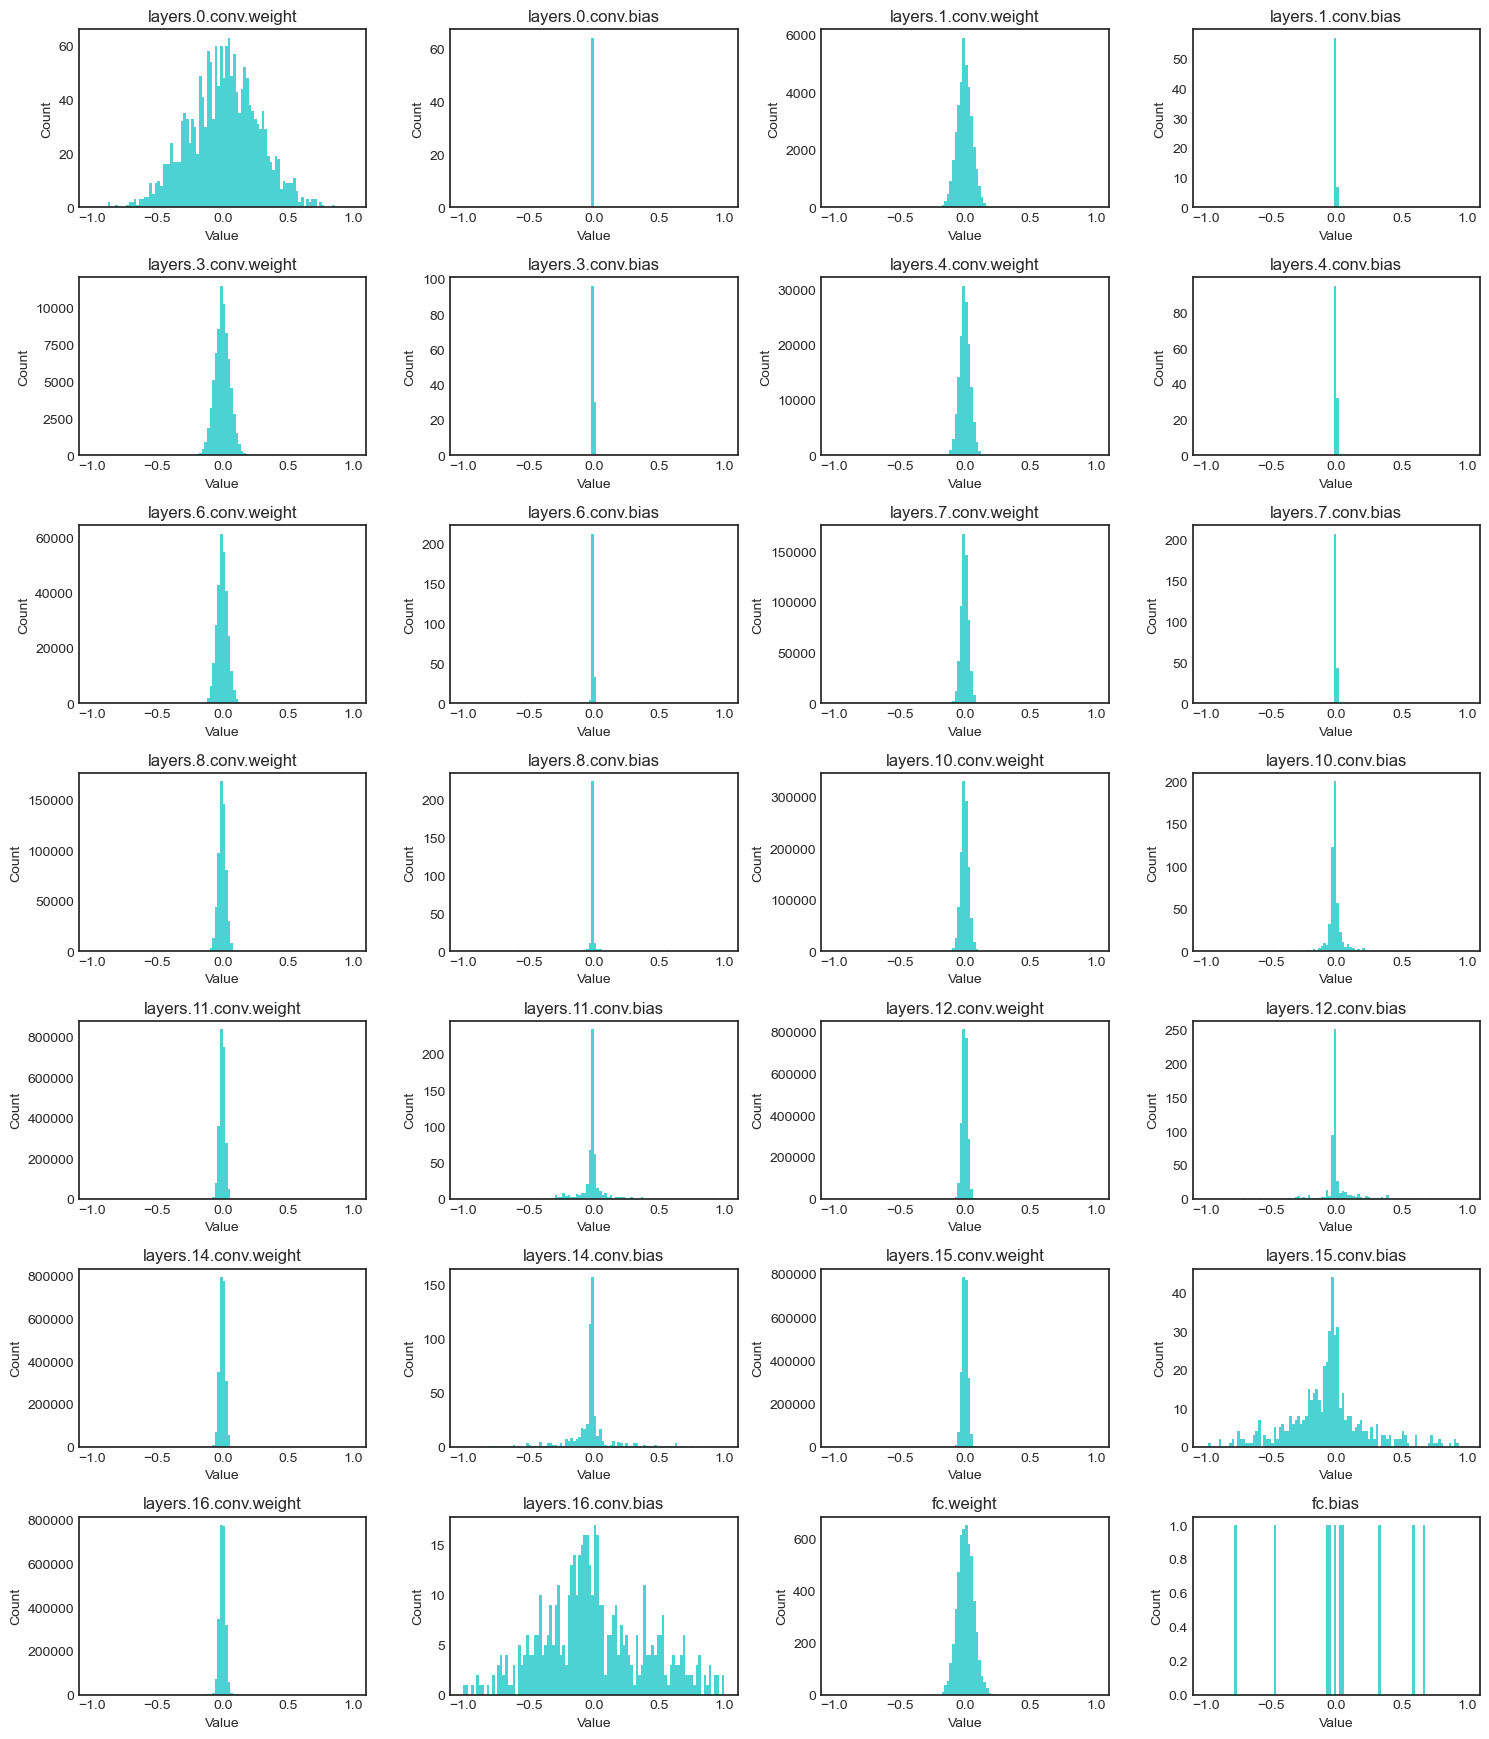

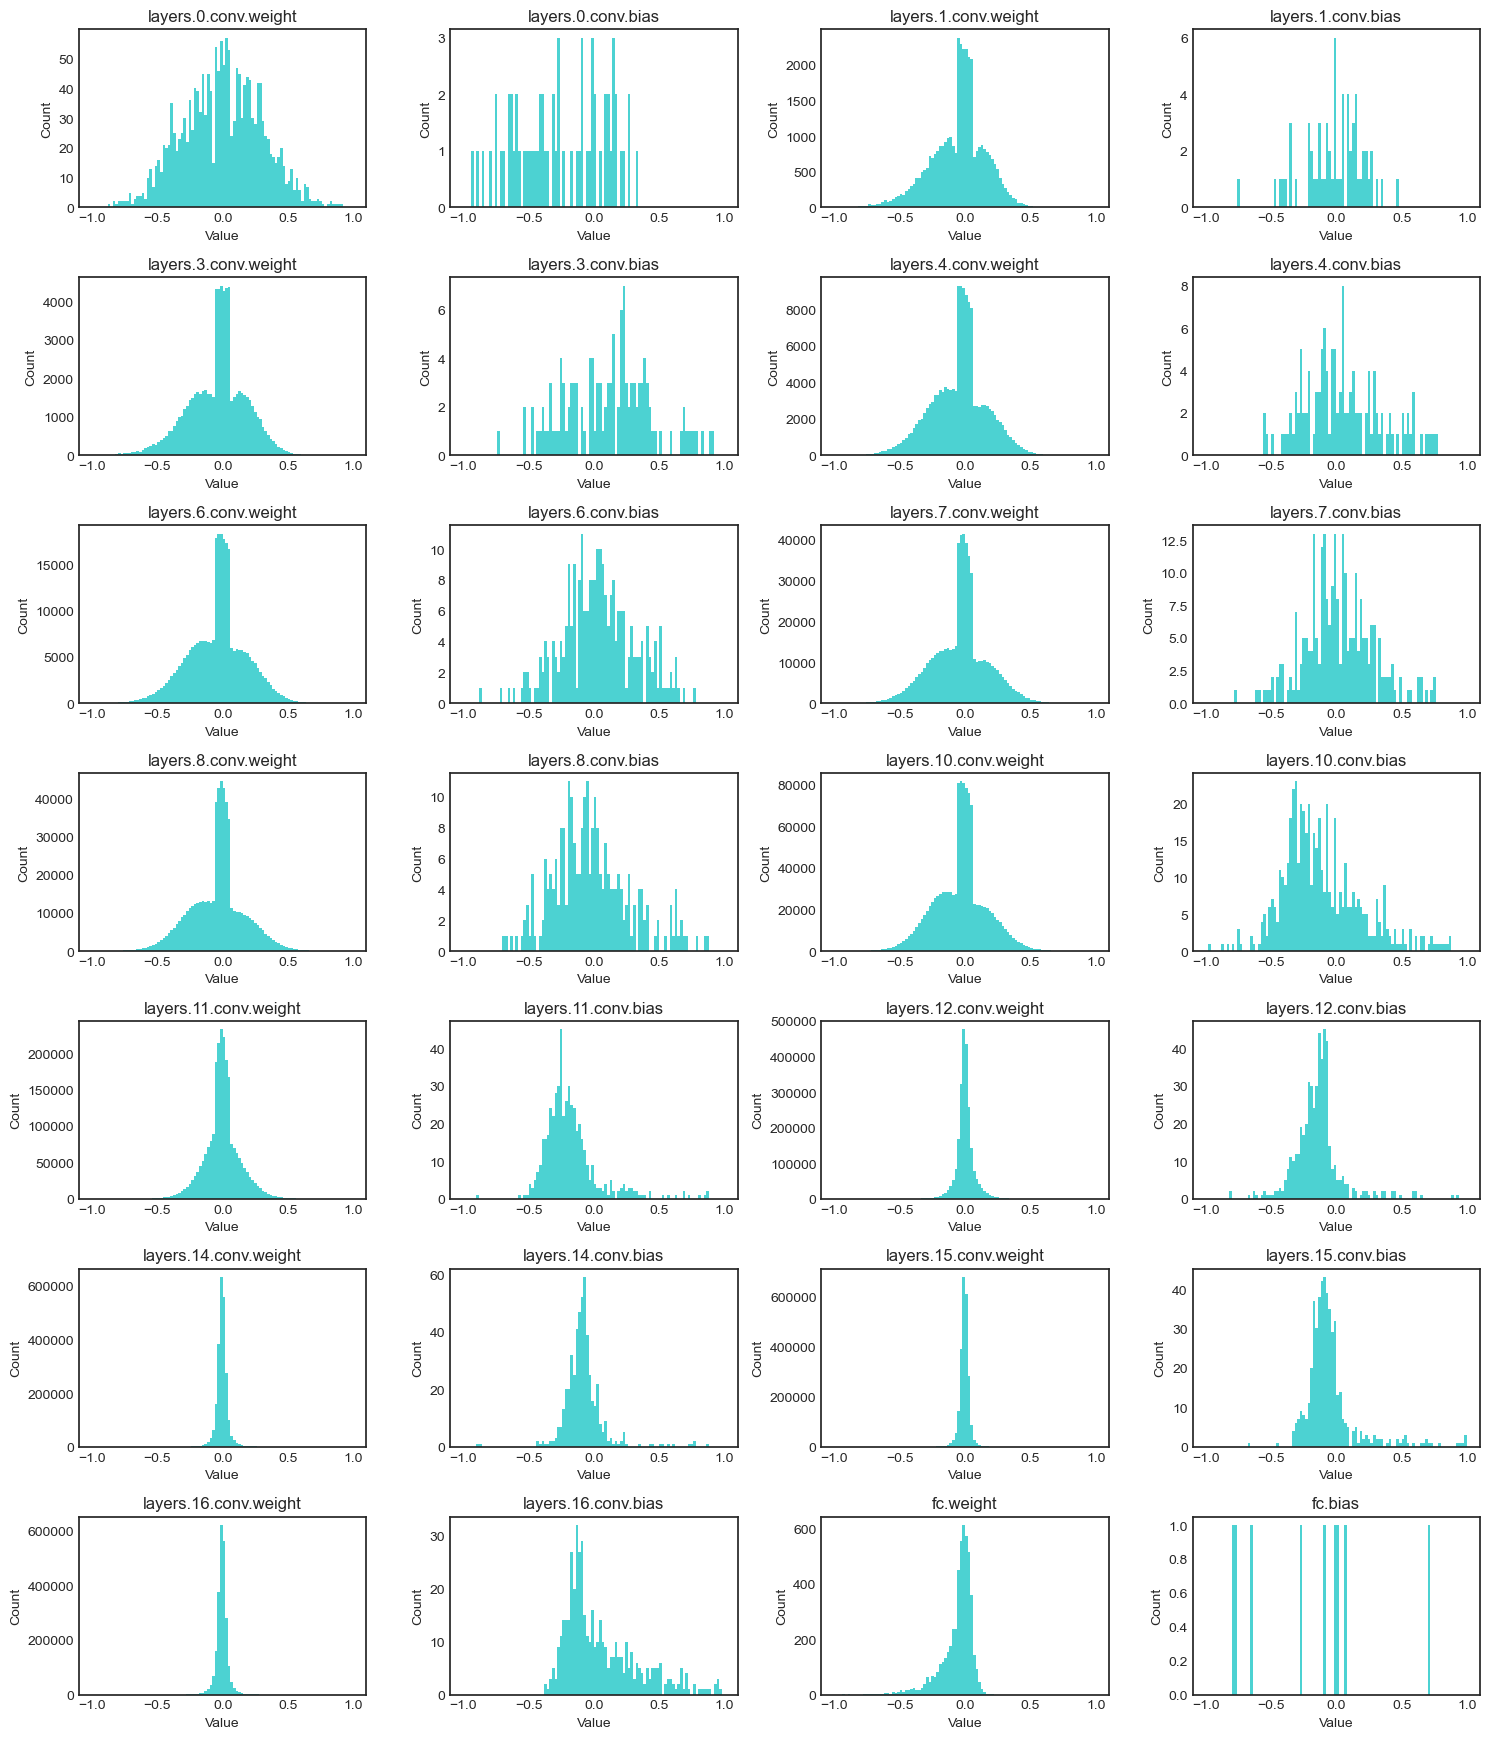

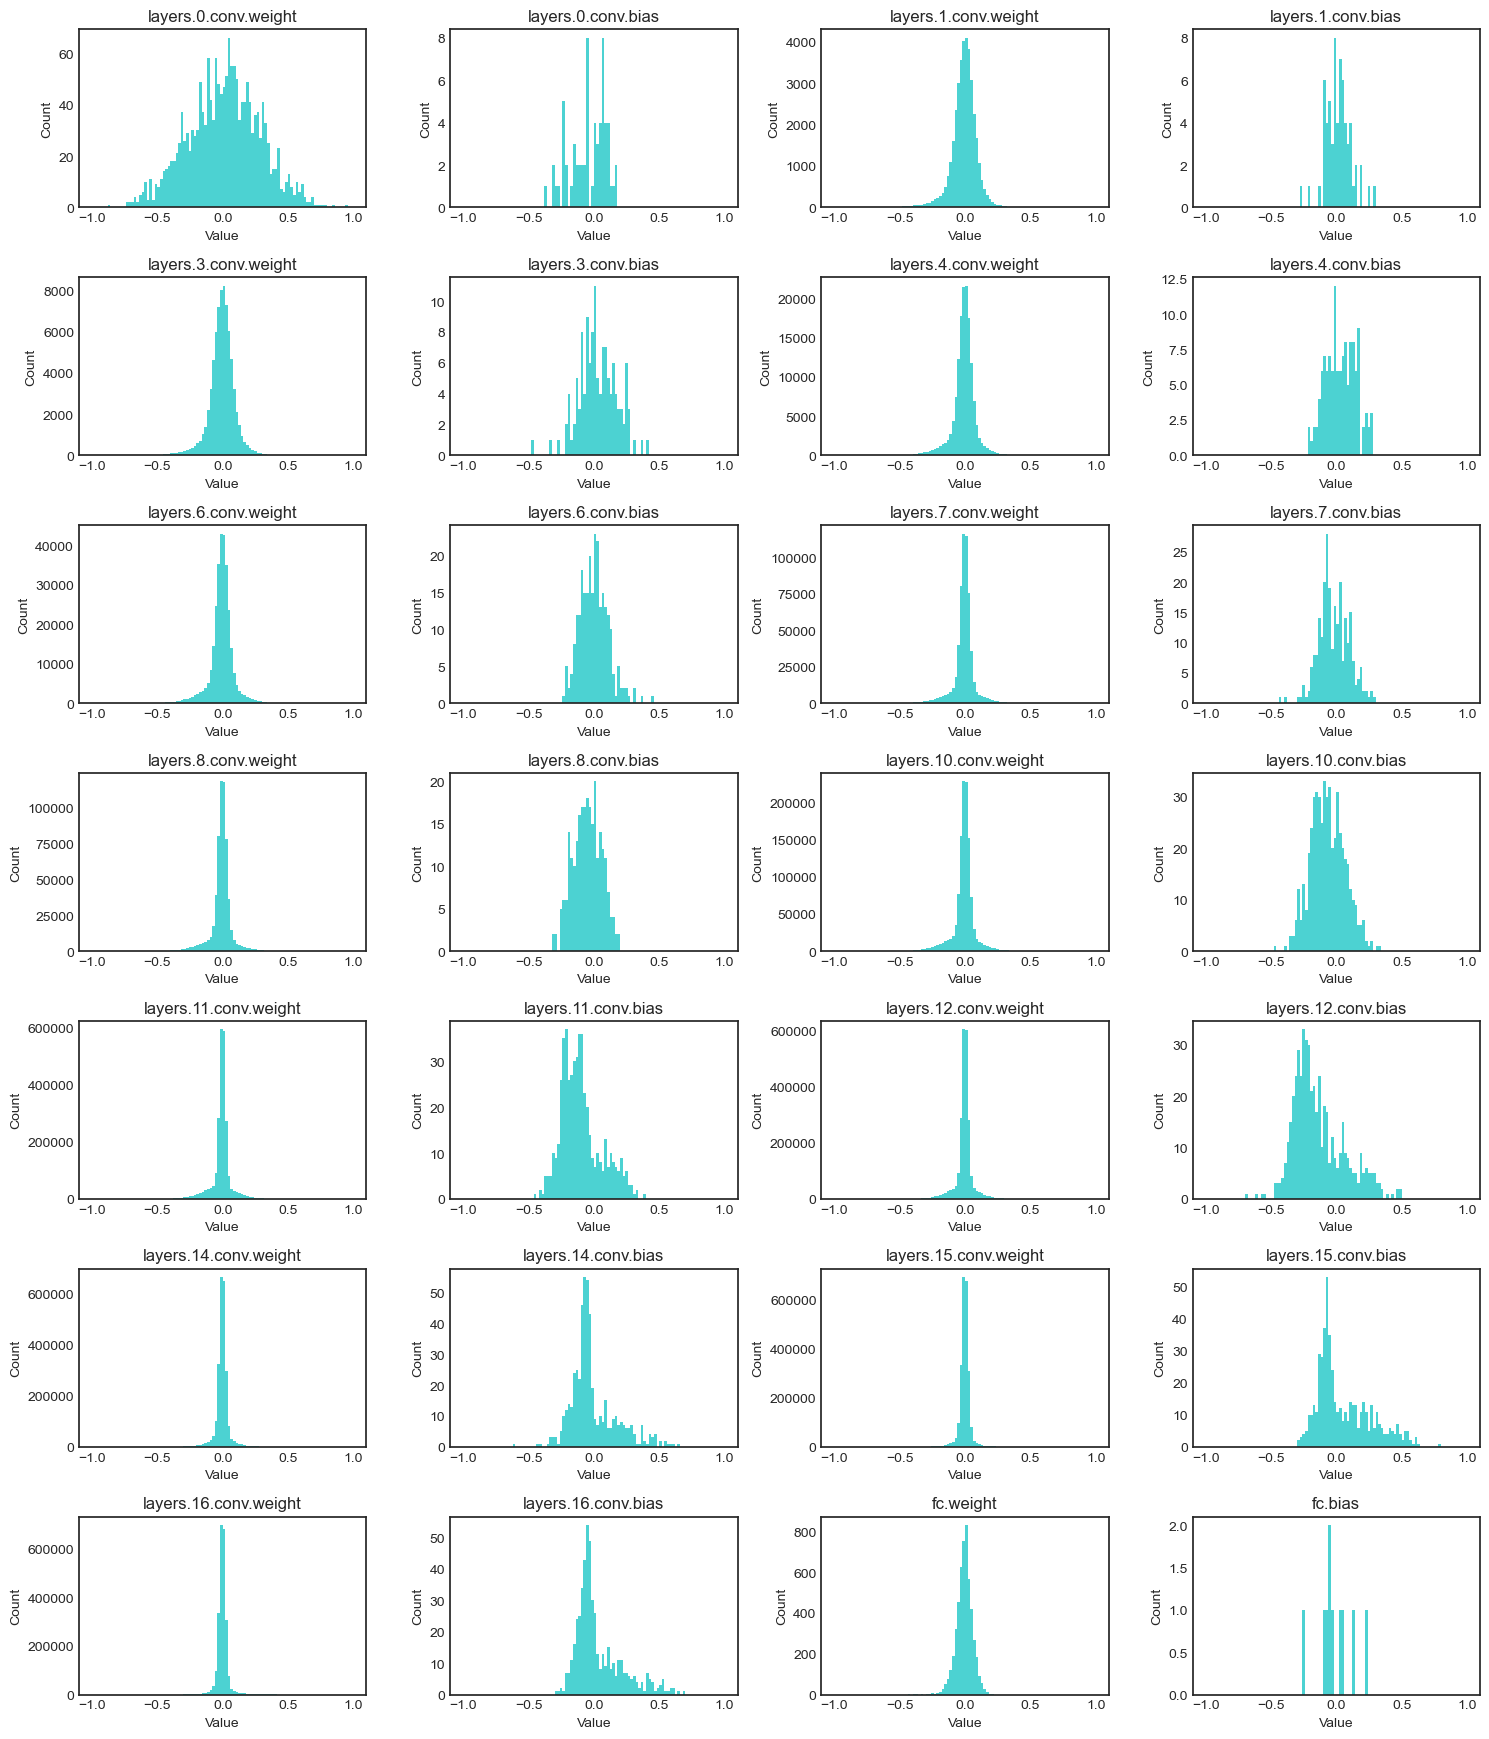

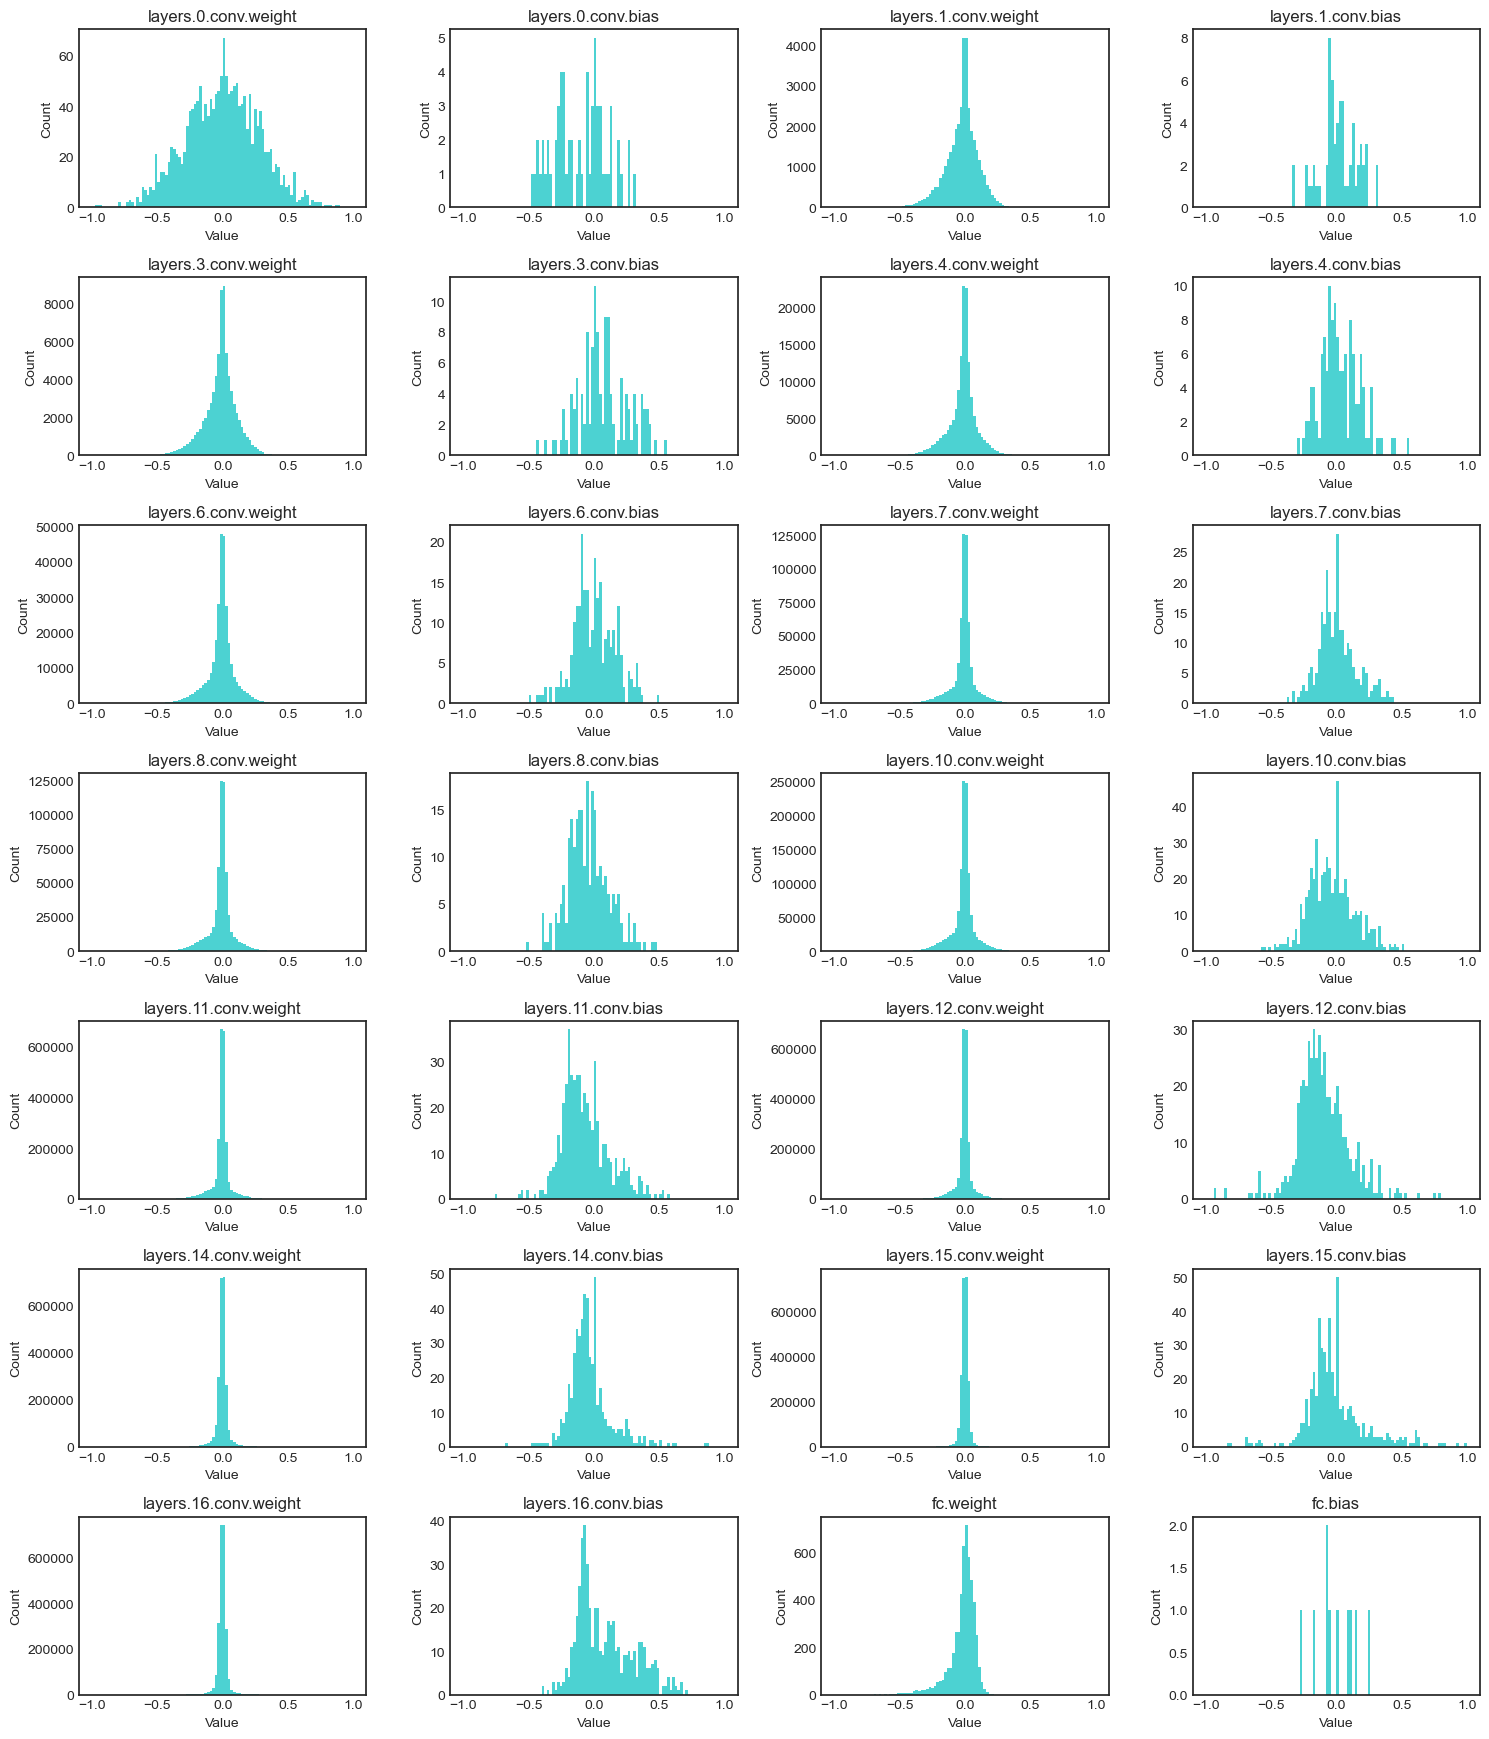

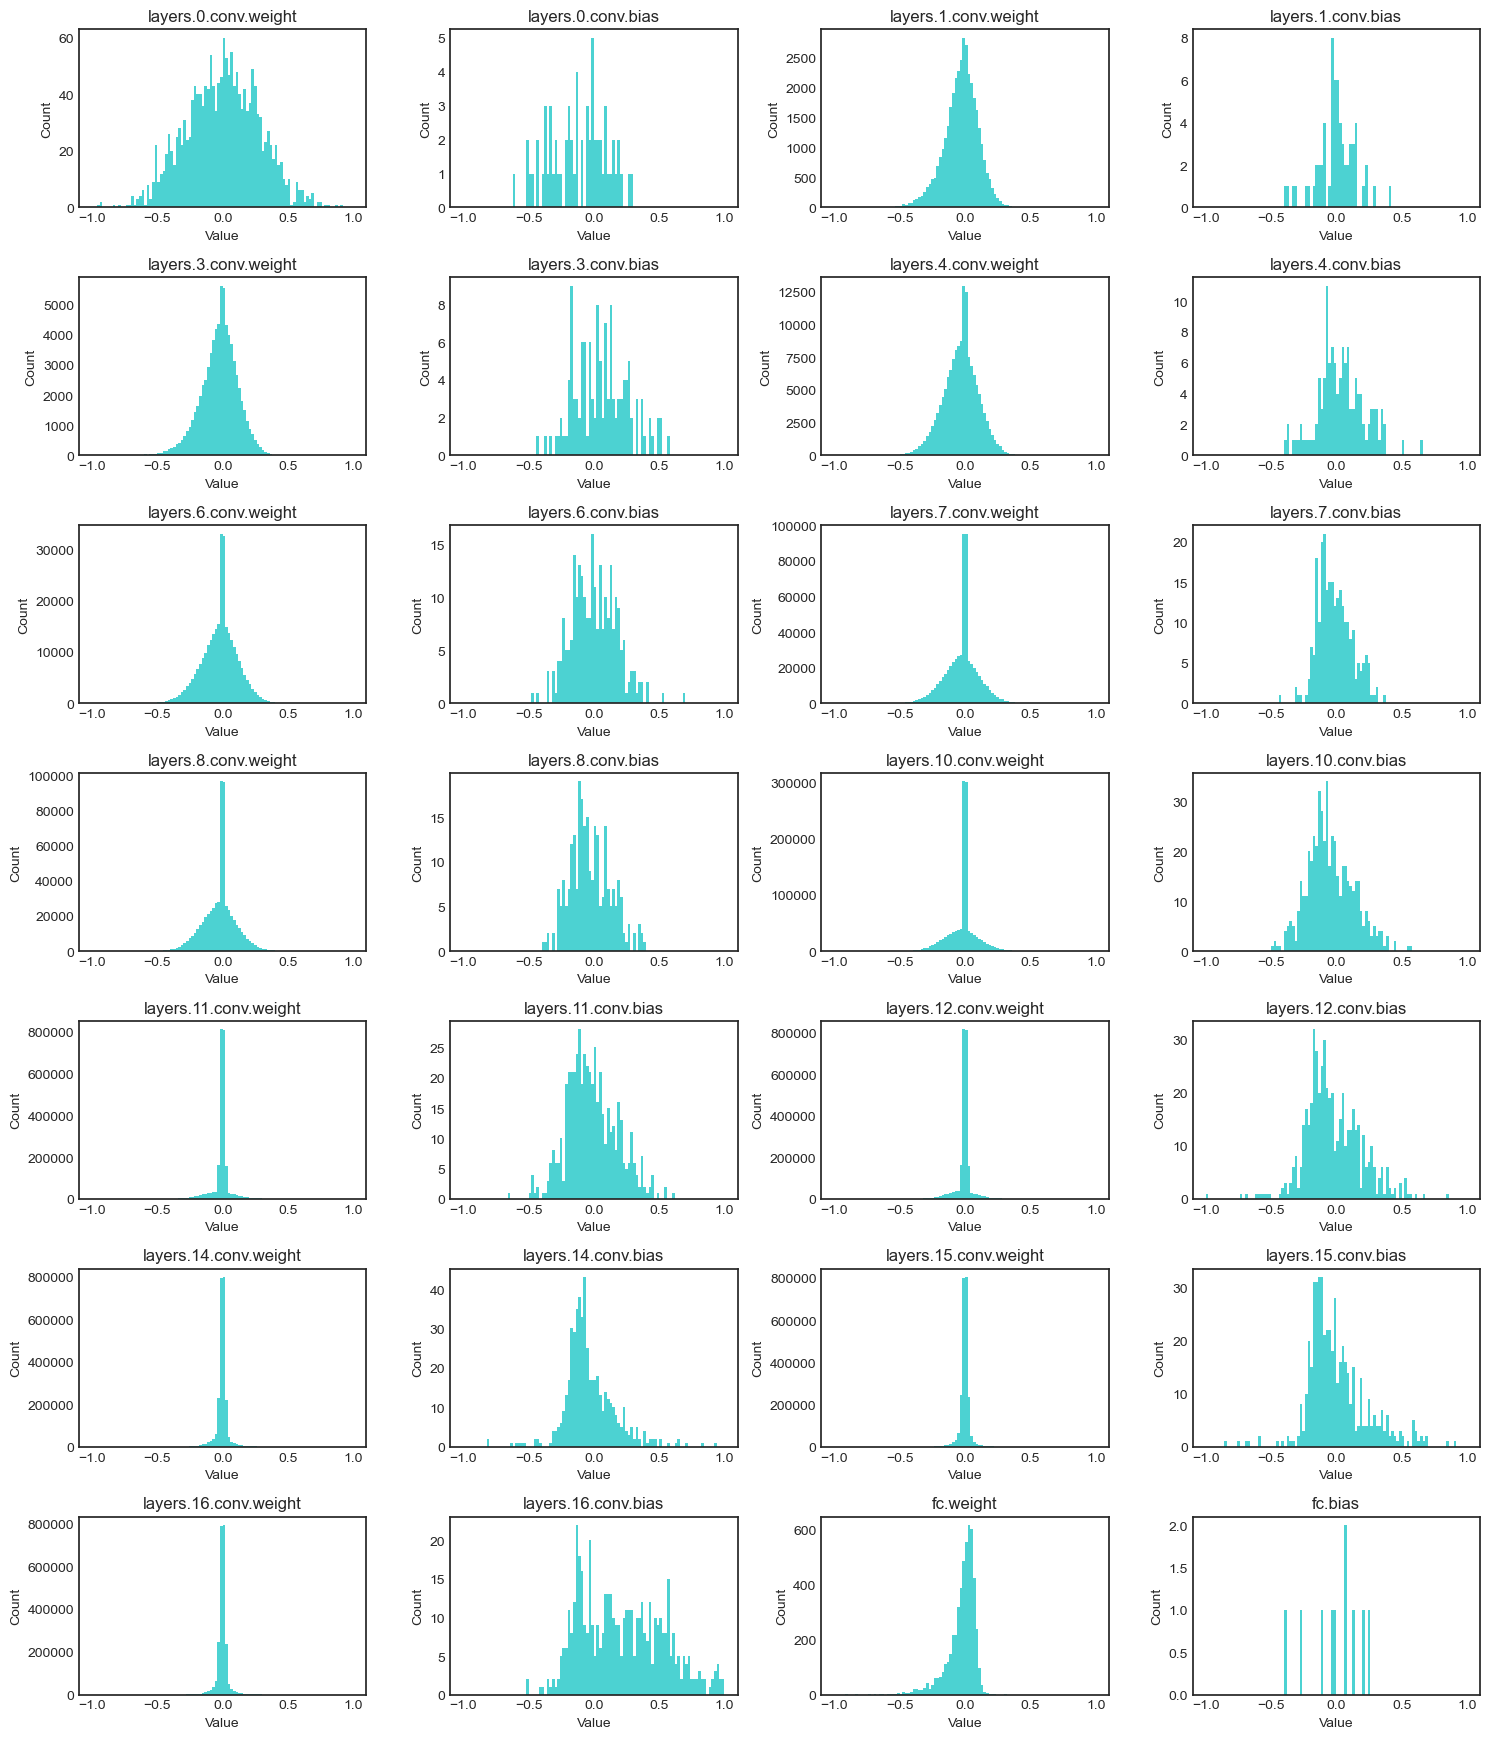

: 

In [2]:
pruners = ['grasp', 'mag', 'rand', 'snip', 'synflow']
# pruners = ['grasp']
dataset = 'cifar10'
model_name = 'vgg16'
model_class = 'lottery'

## Run Experiment ##
# plot weight histogram
for pruner in pruners:
    result_dir = 'Results/data/lottery_vgg16_cifar10/singleshot/{}/0.5'.format(pruner)
    device = load.device('0')
    input_shape, num_classes = load.dimension(dataset) 

    model = load.model(model_name, model_class)(input_shape, 
                                            num_classes, 
                                            False, 
                                            False)
    checkpoint = torch.load('{}/model.pt'.format(result_dir), map_location=device)
    model.load_state_dict(checkpoint)
    plot_weight_histograms(model, result_dir, pruner)
    del model